## Do analysis of lab data for quantum process tomography

This script uses analysis methods from the git repository https://github.com/huangtangy/EM-QPT/tree/main/EM_QPT_online in specific the class QPT and the functions get_chiF and get_exp_plot that were copied in this script, which is an alternative to the main script to analyse the lab data.

In [58]:
from QPT import QPT
from QPT import *
import numpy as np
import matplotlib.pyplot as plt
import qutip
from scipy.linalg import sqrtm
from itertools import product

Read in exemplary data for identity and $\sigma_x$ gate.

In [59]:
measure_data_1 = np.array([[0.007, 0.993], [0.486, 0.514], [0.484, 0.516], 
                           [0.495, 0.505], [0.003, 0.997], [0.512, 0.488], 
                           [0.471, 0.529], [0.499, 0.501], [0.994, 0.006], 
                           [0.998, 0.002], [0.498, 0.502], [0.486, 0.514]])
measure_data_2 = np.array([[0.997, 0.003], [0.497, 0.503], [0.490, 0.510], 
                           [0.487, 0.513], [0.997, 0.003], [0.479, 0.521], 
                           [0.499, 0.501], [0.494, 0.506], [0.995, 0.005], 
                           [0.003, 0.997], [0.478, 0.522], [0.469, 0.531]])

Functions from git repository to plot and calculate fidelity.

In [60]:
def get_chiF(chi1, chi2):
    """Calculate the fidelity between two quantum processes represented by χ matrices."""
    sqrt_chi1 = sqrtm(chi1)
    return np.real(np.trace(sqrtm(sqrt_chi1 @ chi2 @ sqrt_chi1))**2)


def get_exp_plot(measure_data,N):
  
    '''
    Visualizing the measurement data for a N-qubit gate (only for 1-q gate)
    '''

    if N<2:
        rotation = ["I", "ry(90)", 'rx(90)']
        initial_state =['|0>','|+>','|->','|1>']
        observables =['|0><0|','|1><1|']
        cir_lab = list(product(initial_state,rotation))
        
        z = measure_data  
        th = 0
        ylabel = []
        plt.figure()
        fig, ax = plt.subplots(figsize=(4,8))
        ax.imshow(z)
        ax.set_xticks(np.arange(len(observables)), labels=observables)
        ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
        for j in range(len(z)):
            for k in range(len(z[0])):
                text = ax.text(k,th, round(z[th,k], 3), ha="center", va="center", color="w")
            th+=1
            ylabel.append(cir_lab[j][0]+','+cir_lab[j][1])
        ax.set_yticks(np.arange(len(ylabel)), labels=ylabel)
        plt.show()
    else:
        print('It is only for N=1')



<Figure size 640x480 with 0 Axes>

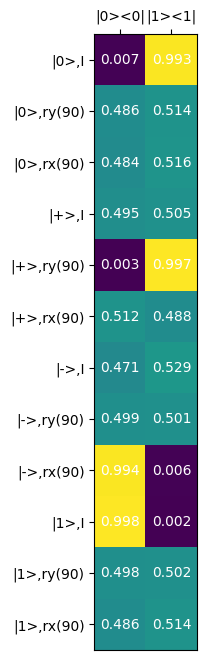

<Figure size 640x480 with 0 Axes>

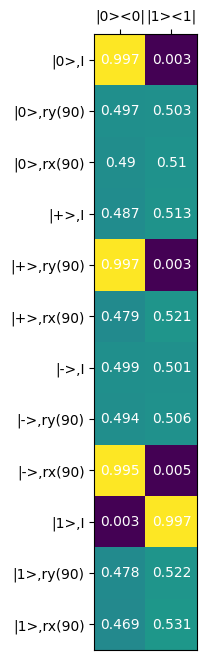

In [61]:
get_exp_plot(measure_data_1, N=1)
get_exp_plot(measure_data_2, N=1)

Do QPT with measurement data.

In [62]:
qpt_id = QPT(N=1, measure_data=measure_data_2)
qpt_x  = QPT(N=1, measure_data=measure_data_1)

chi_id_pred = qpt_id.get_chi_LS_X(qpt_id.rho_in_idea, qpt_id.observables) 
chi_x_pred  = qpt_x.get_chi_LS_X(qpt_x.rho_in_idea,  qpt_x.observables) 

Get ideal $\chi$ matrix for gates to calculate fidelity.

In [63]:
from qutip import sigmax, sigmay, sigmaz, qeye, to_super
from qutip.tomography import qpt

pauli_sys = [qeye(2), sigmax(), sigmay(), sigmaz()]

chi_id_ideal = qpt(to_super(qeye(2)), op_basis_list=[pauli_sys])
chi_x_ideal  = qpt(to_super(sigmax()), op_basis_list=[pauli_sys])

FF_noEM_id = get_chiF(chi_id_pred, chi_id_ideal)
print(f"Fidelity (no EM): {FF_noEM_id}")

FF_noEM_x = get_chiF(chi_x_pred, chi_x_ideal)
print(f"Fidelity (no EM): {FF_noEM_x}")

Fidelity (no EM): 0.9919025541785209
Fidelity (no EM): 0.9842572470577919


Plot the $\chi$ matrices for for the Identity gate and the second measurement.

Text(0.5, 0.98, 'Measurement 2 for $I$ Gate')

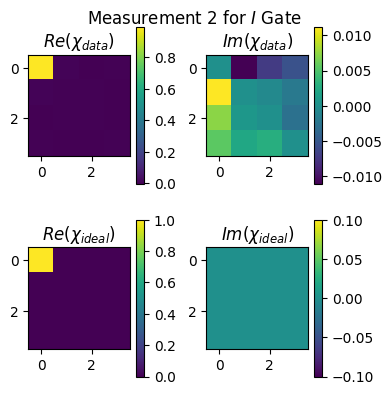

In [69]:
zlist_id =[np.real(chi_id_pred),np.imag(chi_id_pred),np.real(chi_id_ideal),np.imag(chi_id_ideal)]
titlist_id = [r'$Re(\chi_{data})$',r'$Im(\chi_{data})$',r'$Re(\chi_{ideal})$',r'$Im(\chi_{ideal})$']
plt.figure(figsize=(4,4))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(zlist_id[i])
    plt.colorbar()
    plt.title(titlist_id[i])
plt.tight_layout()
plt.suptitle(r'Measurement 2 for $I$ Gate')

Plot the $\chi$ matrices for for the $\sigma_x$ gate and the first measurement.

Text(0.5, 0.98, 'Measurement 1 for $X$ Gate')

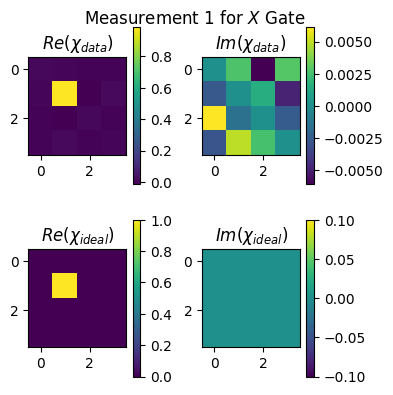

In [67]:
zlist_x =[np.real(chi_x_pred),np.imag(chi_x_pred),np.real(chi_x_ideal),np.imag(chi_x_ideal)]
titlist_x = [r'$Re(\chi_{data})$',r'$Im(\chi_{data})$',r'$Re(\chi_{ideal})$',r'$Im(\chi_{ideal})$']
plt.figure(figsize=(4,4))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(zlist_x[i])
    plt.colorbar()
    plt.title(titlist_x[i])
plt.tight_layout()
plt.suptitle(r'Measurement 1 for $X$ Gate')